## 1. BioToolbox examples

In [1]:
import sys
import time
from main import DNASequence, RNASequence, AminoAcidSequence, filter_fastq, telegram_logger
from bio_files_processor import convert_multiline_fasta_to_oneline

### 1.1 Biological sequences classes

In [2]:
dna = DNASequence('AGATACACA')
print(type(dna))
print(dna.complement())

<class 'main.DNASequence'>
TCTATGTGT


In [3]:
rna = dna.transcribe()
rna

RNASequence: AGAUACACA

In [4]:
aa = AminoAcidSequence('YVWLGKQRFM')
aa.get_molecular_weight()

1327.6

### 1.2 Fastq filter

In [5]:
%%file input.fastq
@f465b3f0-5682-4154-9b2f-62d99226dfe9
CGGTAGCCGCATTGTTTCTCGGCGTGGAAATTGTTTGGGATATCTCTACGTGACGTTCATATCGGAGAGAATAGTTCTGTTAGTGCTGATATTGCACCAATCCATCTGAAATCTTGGTTTCCCTGTCGCTCGTAAGCTTCACTGCAAAGAATGCTGTACGGAAAATAGAGCGACAGAGGAAAGCAGTTCCATTCACTCCGATAGAAA
+
*#&&'%$$%)&,,$)--%&*#&(%-#%###$*%./1$'&$&'#&')'$((%$,*,32*',317018*(#&.)%&25(%%$$$$($+)04102*++'()*-6610.'-(0247848:>9<@-.,5454169)+-)*)666<544-044*&%%%%/10*+*'*'-15-*+,(1,,'''(0()*%$&#./165**'('(90611,%$(&(
@a747f733-423c-4f93-ba1e-127a1a7b9939
CAAAGTGCTTCGTTCATTTCGGAACAGATTGTTGTAACGGATATCGCCGTGACGTTTCATCTATCGGAGGAAGCTGGTTTCGTGGTGCTGATATTGCGATCATCAAATCTTGCCGGTTCCTGTCGCTCACGTAAACACTGAAATTTATTGCAGATGAGCGACAGTGAGTTCCATTCTCCGATAGATGGC
+
$##$$$%%&'134,%%%&'%#$###$%&&0+/3%###%&*%$%$&$%(011.+'69;::572*&:,0.*($$#$$#%').&&)*040+&12,'24$)$$&*&%'#&*%$$%%#'%*1<&'//-2''/>)B>>>=25*'$$&&$$'-'(*&+&&&*%$)407,%-'$&'*-+1-.+/%,2010/01.%&$
@13e0d231-8bd4-4494-b6bf-112e0077142f
CACCGTGCACTTCGTTCAGATCAGGAAGTGGTGTTTACTTGATTGCATCGCCTACCGTGACGTTTCATCTATCGGAGAATGGGGGCTTGCAATCGCTCATCTTCCGTACGCAGTACTTTTTGTGTTTACGAGGAAGATGAGCAGGCAGAACCAAGATTTCCAGATGGACTGGGTGCAATATCGGCACCCAACAG
+
'$%$$#$"##$%*23(,$&%&*%'$()%($&/.))()%&'+($&%%%&)%&%(&)*,353B;FEA;546(($?1667-6;*-'&%##$$'#(&&&-.)-''/.),+-(($101669<:77;75,984%%/-(($'&21+),,')+*%(#%&/%'$(EHF*/))1016797201,%+%&/-*6.5::154##&%$
@ef575bcc-a89d-4bf3-b671-2d0f514af2dc
CGTTGTGCCGTTCATTTCGGAAGGTGGGGTGTTTGACTGGTATCTACCGTGACATTTTCGGCATCTATCGGGGGAATGGTTTCTGTTTGGTGCTGACTTATTCTTTGAGGTGTCCCATCTGGAAATCTTGGTTCCGCCTGTCATCTCGTAAGCACAAGTACTTTTTGTATGAAGATAGGCGACGAGCAGTTCCATTCCCTCCGATAGATGAGGAAAAATC
+
#$'('$##&,1/(('('($$##&''$)+*0&&(+$$#$#$$$$.&%#%)+-,.%146(&#$&%#$,/4='*('(&/3+/24+,'&$$%%()'$$''%%%$''%$%%#$($%#&%((+1//,,.179>=C-4:>).022+')--)5(-'((/$5221,$'$#$$$&%$##$''*212(((*(%(%%$)%*.4-3/.0'+$&)4986/.?15,-,040./$#

Overwriting input.fastq


In [6]:
filter_fastq("input.fastq", gc_bounds=(30, 70), 
             length_bounds=(20, 200), quality_threshold=10)

In [7]:
!cat input_filtered.fastq

@13e0d231-8bd4-4494-b6bf-112e0077142f
CACCGTGCACTTCGTTCAGATCAGGAAGTGGTGTTTACTTGATTGCATCGCCTACCGTGACGTTTCATCTATCGGAGAATGGGGGCTTGCAATCGCTCATCTTCCGTACGCAGTACTTTTTGTGTTTACGAGGAAGATGAGCAGGCAGAACCAAGATTTCCAGATGGACTGGGTGCAATATCGGCACCCAACAG
+
'$%$$#$"##$%*23(,$&%&*%'$()%($&/.))()%&'+($&%%%&)%&%(&)*,353B;FEA;546(($?1667-6;*-'&%##$$'#(&&&-.)-''/.),+-(($101669<:77;75,984%%/-(($'&21+),,')+*%(#%&/%'$(EHF*/))1016797201,%+%&/-*6.5::154##&%$


### 1.3 Telegram logger

In [8]:
chat_id = 502514437

@telegram_logger(chat_id)
def good_function():
    print("This goes to stdout")
    print("And this goes to stderr", file=sys.stderr)
    time.sleep(2)
    print("Wake up, Neo")

@telegram_logger(chat_id)
def bad_function():
    print("Some text to stdout")
    time.sleep(2)
    print("Some text to stderr", file=sys.stderr)
    raise RuntimeError("Ooops, exception here!")
    print("This text follows exception and should not appear in logs")
    
@telegram_logger(chat_id)
def long_lasting_function():
    time.sleep(2000)

In [9]:
bad_function()

RuntimeError: Ooops, exception here!


In [10]:
good_function()

> In your Telegram bot you will see next messages:
> 
> 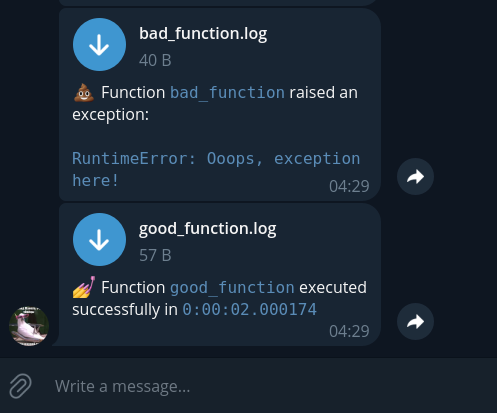

> Let's look at log file content:

In [11]:
!cat /home/ksum/Downloads/bad_function.log

Some text to stdout
Some text to stderr


In [12]:
!cat /home/ksum/Downloads/good_function.log

This goes to stdout
Wake up, Neo
And this goes to stderr


### 1.4 Convert multiline fasta to oneline

In [13]:
%%file multiline.fasta
>Sequence_1
GTGATGACATAGCTGCCATTTGGATTCCGA
CGGGTGATGTAATACTTCACGCCGATGTAC
GTCGGTTCGCTTGGTTGGTCCAAGTCCGGG
GGGAAATAAGGGGTCCTTACATCCGCACGA
AGTCTGTCCATGCGGAAACGCGGGATTAAA
>Sequence_2
CAATTGACCTCTTGATTTGCTACTGTATTC
TTTTCAGATCCTGGACACCTTCTCCGGTAC
TACTCTAGACCGAATCTATCTATGCCTATG
TAGGAGGCATCTCATCTCAACATTTAATGA
AACACATGAGCGCATTATCTGCGAAAAAAG
>Sequence_3
TAGGAAGTCTATGTGGGCCACAACAATGTA
TAGTTACGCGGCCAGTCCGTAGAGTGACTC
AGTATGAGGGAGCAGGAGTTGAATACATTG
GCGGATATTTAACGAACCCTCACATCGTCA
TGTGGGTGCAGGTTGAACCTGATGTCTTTC

In [15]:
convert_multiline_fasta_to_oneline('multiline.fasta')

In [16]:
!cat multiline_oneline.fasta

## 2. Test `main` module

In [17]:
!python -m pytest -v

============================= test session starts ==============================
platform linux -- Python 3.12.3, pytest-8.2.0, pluggy-1.5.0 -- /home/ksum/anaconda3/envs/lasthwenv/bin/python
cachedir: .pytest_cache
rootdir: /home/ksum/Python BI/hw5_babybiotools
collected 12 items                                                             

test_main.py::TestNucleicAcidAndDNASequence::test_nucleic_acid_sequence_init_error PASSED [  8%]
test_main.py::TestNucleicAcidAndDNASequence::test_dna_sequence_creation PASSED [ 16%]
test_main.py::TestNucleicAcidAndDNASequence::test_dna_sequence_check_alphabet PASSED [ 25%]
test_main.py::TestNucleicAcidAndDNASequence::test_dna_sequence_complement PASSED [ 33%]
test_main.py::TestNucleicAcidAndDNASequence::test_dna_sequence_transcribe PASSED [ 41%]
test_main.py::TestFastqFilter::test_filter_fastq_writes_output_file PASSED [ 50%]
test_main.py::TestFastqFilter::test_filter_length PASSED                 [ 58%]
test_main.py::TestFastqFilter::test_filter_g

## 3. Parallel `RandomForestCustom`

In [2]:
from custom_random_forest import RandomForestClassifierCustom
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [10]:
X, y = make_classification(n_samples=100000)
random_forest = RandomForestClassifierCustom(max_depth=30, n_estimators=10, 
                                             max_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 3.1 One process:

In [11]:
%%time

random_forest.fit(X_train, y_train, n_jobs=1)

CPU times: user 72.5 ms, sys: 144 ms, total: 216 ms
Wall time: 4.89 s


RandomForestClassifierCustom(max_depth=30, max_features=2, random_state=42)

In [12]:
%%time

pred1 = random_forest.predict(X_test, n_jobs=1)

CPU times: user 106 ms, sys: 312 ms, total: 418 ms
Wall time: 532 ms


#### 3.2 Two processes:

In [13]:
%%time

random_forest.fit(X_train, y_train, n_jobs=2)

CPU times: user 99.2 ms, sys: 530 ms, total: 630 ms
Wall time: 2.95 s


RandomForestClassifierCustom(max_depth=30, max_features=2, random_state=42)

In [15]:
%%time

pred2 = random_forest.predict(X_test, n_jobs=2)

CPU times: user 96.7 ms, sys: 144 ms, total: 241 ms
Wall time: 398 ms


#### 3.3 Comparison:

In [16]:
(pred1 == pred2).all()

True

🎉🎉🎉🎉🎉